In [15]:
import os 

import numpy as np
import scipy.stats as sps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from matplotlib.cm import get_cmap

import sys, os
sys.path += [os.path.abspath(os.pardir + '/src')]
print(sys.path)

from experiment import init_random_state, BanditLoopExperiment, get_ts_model, get_random_model

sns.set(font_scale=1.3, palette='tab20') 


['/home/anton/Desktop/m1p/2021-Project-74/notebooks', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/anton/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/simpleeval-0.9.10-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/sh-1.13.1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/mldev-0.3.dev2-py3.8.egg', '/usr/lib/python3/dist-packages', '/home/anton/.local/lib/python3.8/site-packages/IPython/extensions', '/home/anton/.ipython', '/home/anton/Desktop/m1p/2021-Project-74/code', '/home/anton/Desktop/m1p/2021-Project-74/src', '/home/anton/Desktop/m1p/2021-Project-74/src']


In [3]:
seed = 42

p = 0.9
Q = 1
ws = [1,4,10]
b = 0.0

T = 5000
M = 10
l = 4

In [4]:
interests, _, responses = [], [], []
interests_TS, TS_paramss_TS, responses_TS = [], [], []

In [6]:
%%time
for w in ws:
    init_random_state(seed)
    
    bandit = lambda: get_random_model(M=M, l=l)
    exp = BanditLoopExperiment(bandit, "random bandit")
    exp.prepare(w=w, Q=Q, p=p, b=b)
    exp.run_experiment(T=T)
    
    results = exp.get_as_np()
    interests.append(results.interest)
    _.append(results.TS_params)
    responses.append(results.response)
    
for w in ws:
    init_random_state(seed)
    
    bandit = lambda: get_ts_model(M=M, l=l)
    exp = BanditLoopExperiment(bandit, "random bandit")
    exp.prepare(w=w, Q=Q, p=p, b=b)
    exp.run_experiment(T=T)
    
    results = exp.get_as_np()
    interests_TS.append(results.interest)
    TS_paramss_TS.append(results.TS_params)
    responses_TS.append(results.response)

CPU times: user 1min 4s, sys: 25.4 ms, total: 1min 4s
Wall time: 1min 4s


In [7]:
# sum_responces = []
# for  i, w in enumerate(ws):
#     sum_responces.append(np.cumsum(responses[i].sum(axis=1)))
# plt.figure(figsize=(12, 8))
# for i, w in enumerate(ws):
#     plt.plot(np.arange(1, T+1), sum_responces[i], label=f'w = {round(w,3)}')

# plt.title('Зависимость суммы откликов от времени')
# plt.ylabel('Сумма откликов')
# plt.xlabel('Шаг')
# plt.legend()
# # plt.savefig('rewards.pdf')

In [8]:
# plt.figure(figsize=(18, 36))
# for m in range(M):
#     plt.subplot(M // 2 + 1, 2, m+1)
#     for i, w in enumerate(ws):
#         plt.plot(interests[i][:, m], label=f'w = {w}')
#     plt.title(f'интерес к {m} объекту')
#     plt.ylabel('интерес')
#     plt.xlabel('Шаг')
#     plt.legend()

#     plt.tight_layout()

In [16]:
colors = [i for i in get_cmap('tab20').colors]

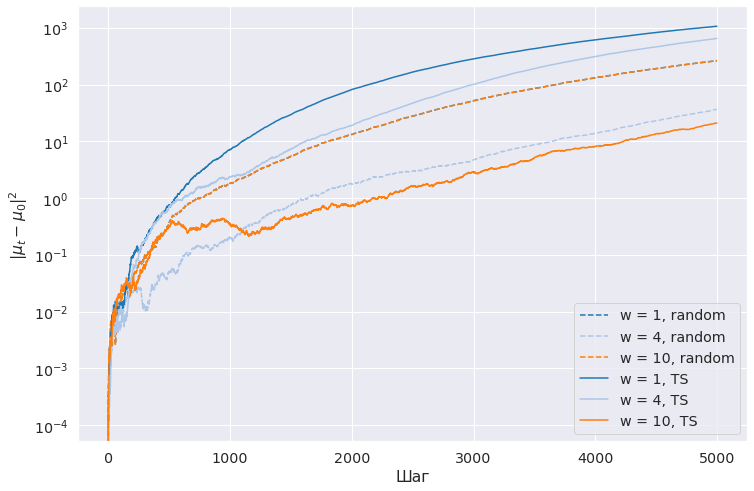

In [22]:
plt.figure(figsize=(12, 8))
for i, w in enumerate(ws):
    plt.plot(np.linalg.norm(interests[i] - interests[i][0], axis=1)**2, ls='--', c=colors[i], label=f'w = {round(w,3)}, random')
for i, w in enumerate(ws):
    plt.plot(np.linalg.norm(interests_TS[i] - interests_TS[i][0], axis=1)**2, c=colors[i], label=f'w = {round(w,3)}, TS')

plt.yscale('log')
plt.ylabel(r'$\|\mu_t - \mu_0 \|^2$')
plt.xlabel('Шаг')
plt.legend()
plt.savefig('compare_random_and_ts.pdf')